In [1]:
import pandas as pd

In [4]:
df_train = pd.read_csv("data/customer_segmentation/train.csv")
df_test = pd.read_csv("data/customer_segmentation/test.csv")

In [5]:
df_train.head(3)

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B


In [10]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

Ever_Married       140
Graduated           78
Profession         124
Work_Experience    829
Family_Size        335
Var_1               76
dtype: int64

In [11]:
# Eliminar nulos
df_train = df_train.dropna()
df_test = df_test.dropna()

In [33]:
X_train, X_test = df_train.drop(["ID", "Segmentation"], axis = 1), df_test.drop(["ID"], axis = 1)
y_train = df_train["Segmentation"]

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
le = LabelEncoder()
y_train = le.fit_transform(y_train)

In [36]:
label_encoders = {}
for categorical_column in ["Gender", "Ever_Married", "Graduated", "Profession", "Spending_Score", "Var_1"]:
    label_encoders[categorical_column] = LabelEncoder()
    label_encoders[categorical_column].fit(X_train[categorical_column])
    X_train[categorical_column] = label_encoders[categorical_column].transform(X_train[categorical_column])
    X_test[categorical_column] = label_encoders[categorical_column].transform(X_test[categorical_column])

### Modelo

In [46]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [43]:
tree = DecisionTreeClassifier(random_state = 20250512)

In [44]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=20250512)

In [45]:
tree.score(X_train, y_train)

0.9537884471117779

[Text(0.5, 0.8333333333333334, 'Age <= 34.0\ngini = 0.749\nsamples = 6665\nvalue = [1616, 1572, 1720, 1757]'),
 Text(0.25, 0.5, 'Age <= 24.0\ngini = 0.608\nsamples = 2175\nvalue = [451.0, 233.0, 252.0, 1239.0]'),
 Text(0.375, 0.6666666666666667, 'True  '),
 Text(0.125, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.375, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.75, 0.5, 'Spending_Score <= 1.5\ngini = 0.724\nsamples = 4490\nvalue = [1165, 1339, 1468, 518]'),
 Text(0.625, 0.6666666666666667, '  False'),
 Text(0.625, 0.16666666666666666, '\n  (...)  \n'),
 Text(0.875, 0.16666666666666666, '\n  (...)  \n')]

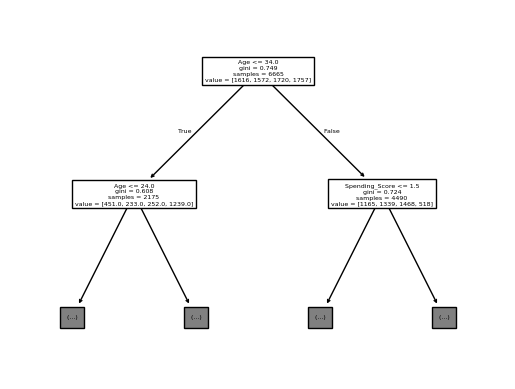

In [48]:
plot_tree(tree, max_depth = 1, feature_names = X_train.columns)

In [49]:
from sklearn.metrics import confusion_matrix, classification_report

In [50]:
y_pred = tree.predict(X_train)

In [52]:
confusion_matrix(y_train, y_pred)

array([[1594,   11,    9,    2],
       [  70, 1475,   24,    3],
       [  37,   85, 1594,    4],
       [  21,   14,   28, 1694]])

In [53]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      1616
           1       0.93      0.94      0.93      1572
           2       0.96      0.93      0.94      1720
           3       0.99      0.96      0.98      1757

    accuracy                           0.95      6665
   macro avg       0.95      0.95      0.95      6665
weighted avg       0.95      0.95      0.95      6665

